# IMPORTACIÓN DE LOS DATOS

In [1]:
import pandas as pd

# Especifica la ruta del archivo CSV
file_path = 'C:/Users/g97rojasmf/Documents/Tesis/df_mora_prestamospersonales.csv'

# Cargar el CSV en un DataFrame
df_mora_prestamos = pd.read_csv(file_path)

In [2]:
import pandas as pd

# Supongamos que df_mora_prestamos es tu DataFrame
# Si no has cargado el DataFrame, puedes hacerlo de la siguiente manera:
# df_mora_prestamos = pd.read_csv('tu_archivo.csv')

# Contar la cantidad de registros y variables
num_registros = df_mora_prestamos.shape[0]  # Número de filas
num_variables = df_mora_prestamos.shape[1]  # Número de columnas

# Imprimir los resultados
print(f"Cantidad de registros: {num_registros}")
print(f"Cantidad de variables: {num_variables}")

Cantidad de registros: 1626264
Cantidad de variables: 32


# REGRESIÓN LOGÍSTICA

#### TECNICAS DE BALANCEO EN CONJUNTO DE ENTRENAMIENTO Y COMPARACION DE RESULTADOS


Medidas de rendimiento para Sin Balanceo (class_weight):
ROC-AUC: 0.9949
Precision: 0.6846
Recall: 0.9696
F1-Score: 0.8026
Accuracy: 0.9725

Reporte de Clasificación:
              precision  recall  f1-score      support
0                0.9981  0.9727    0.9852  459735.0000
1                0.6846  0.9696    0.8026   28145.0000
accuracy         0.9725  0.9725    0.9725       0.9725
macro avg        0.8413  0.9711    0.8939  487880.0000
weighted avg     0.9800  0.9725    0.9747  487880.0000


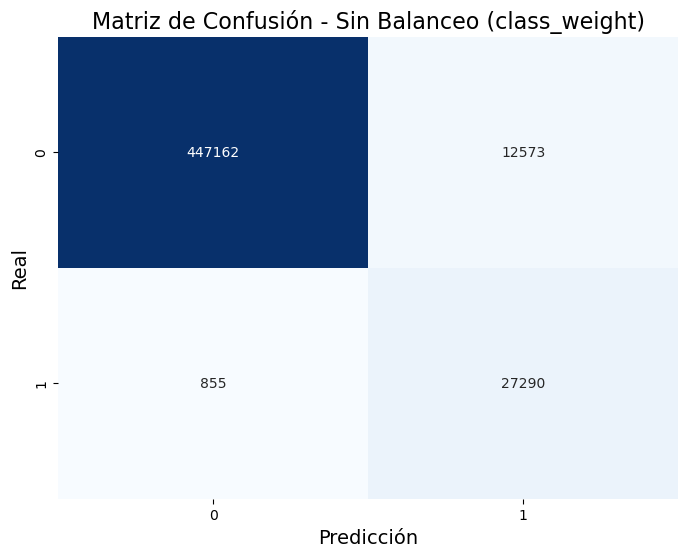

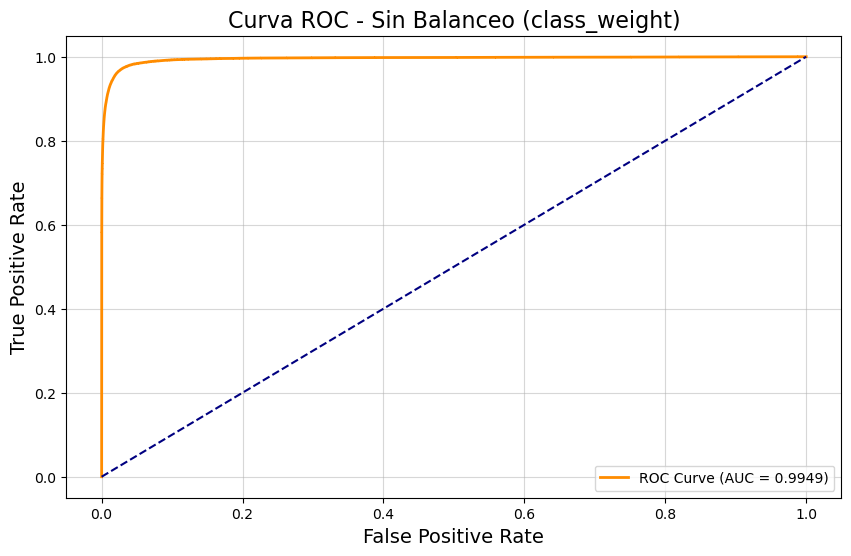


Medidas de rendimiento para SMOTE:
ROC-AUC: 0.9949
Precision: 0.6961
Recall: 0.9683
F1-Score: 0.8099
Accuracy: 0.9738

Reporte de Clasificación:
              precision  recall  f1-score      support
0                0.9980  0.9741    0.9859  459735.0000
1                0.6961  0.9683    0.8099   28145.0000
accuracy         0.9738  0.9738    0.9738       0.9738
macro avg        0.8470  0.9712    0.8979  487880.0000
weighted avg     0.9806  0.9738    0.9758  487880.0000


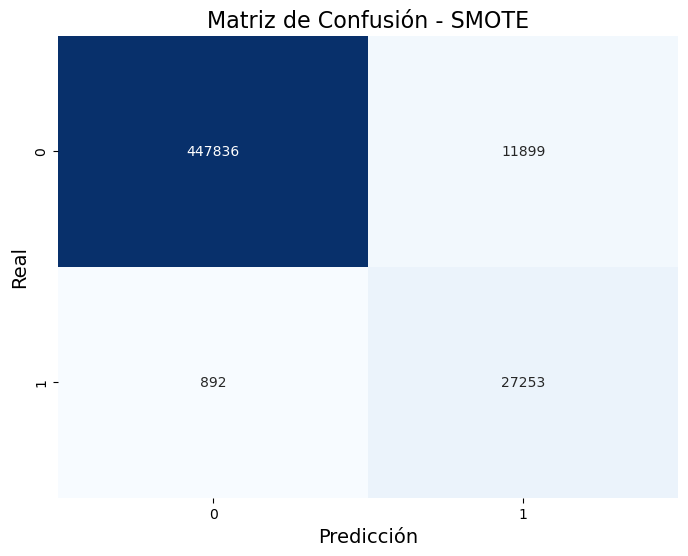

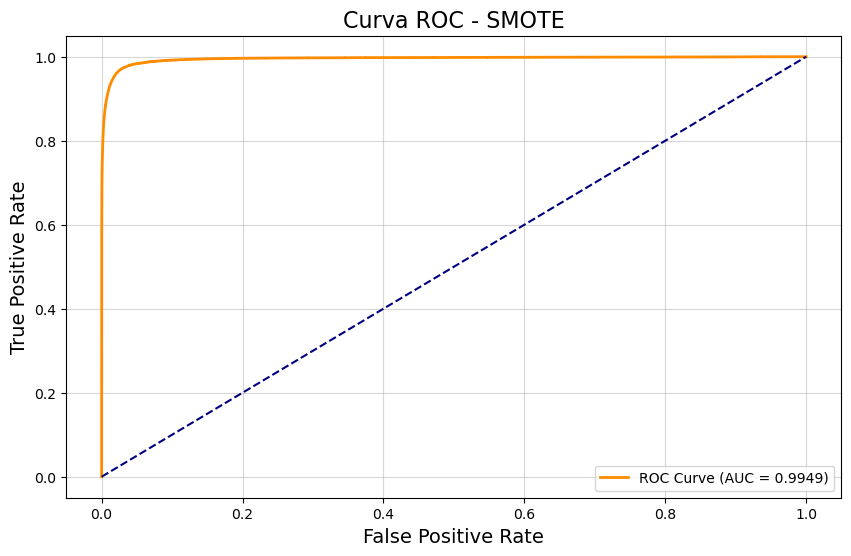


Medidas de rendimiento para SMOTE-Tomek:
ROC-AUC: 0.9949
Precision: 0.6961
Recall: 0.9683
F1-Score: 0.8099
Accuracy: 0.9738

Reporte de Clasificación:
              precision  recall  f1-score      support
0                0.9980  0.9741    0.9859  459735.0000
1                0.6961  0.9683    0.8099   28145.0000
accuracy         0.9738  0.9738    0.9738       0.9738
macro avg        0.8470  0.9712    0.8979  487880.0000
weighted avg     0.9806  0.9738    0.9758  487880.0000


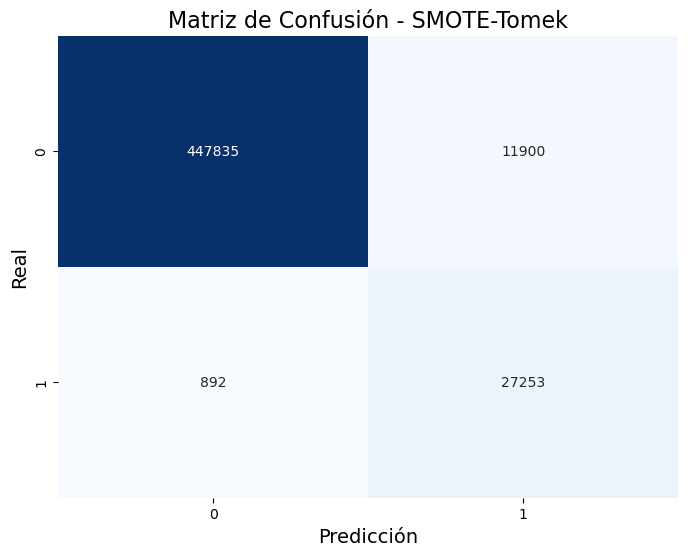

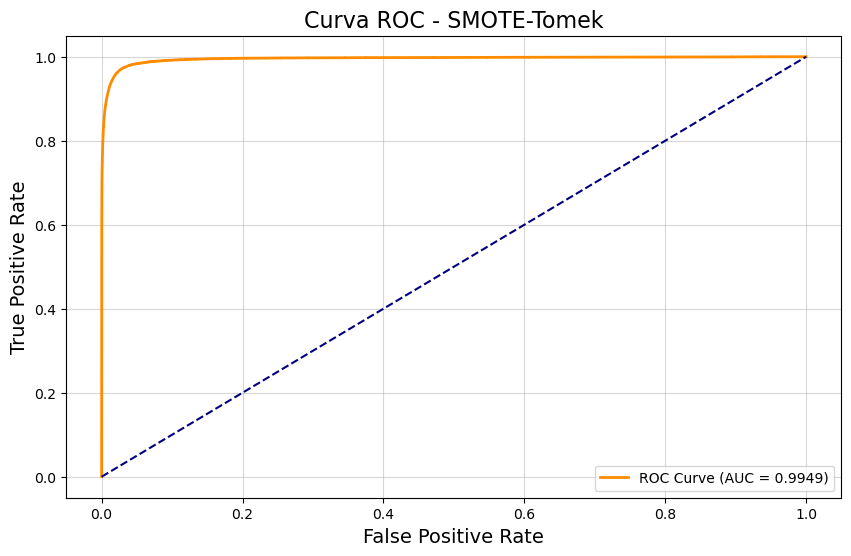


Comparativa de Técnicas de Balanceo:
                              roc_auc  precision    recall        f1  accuracy
Sin Balanceo (class_weight)  0.994945   0.684595  0.969622  0.802553  0.972477
SMOTE                        0.994910   0.696082  0.968307  0.809932  0.973782
SMOTE-Tomek                  0.994910   0.696064  0.968307  0.809920  0.973780


In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    classification_report, 
    confusion_matrix, 
    roc_curve, 
    auc,
    f1_score, 
    accuracy_score, 
    precision_score, 
    recall_score
)
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek

# Configuraciones de semilla para reproducibilidad
np.random.seed(42)

# Cargar dataset
df_mora_prestamos = pd.read_csv('C:/Users/g97rojasmf/Documents/Tesis/df_mora_prestamospersonales.csv')

# Separar características y variable objetivo
X = df_mora_prestamos.drop('Morosidad', axis=1)
y = df_mora_prestamos['Morosidad']

# Dividir el conjunto de datos (70% entrenamiento, 30% prueba)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

# Escalar características (importante para Regresión Logística)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Función para entrenar, predecir y evaluar modelo
def evaluar_modelo(X_train_balanceado, y_train_balanceado, X_test, y_test, nombre_tecnica):
    # Entrenar Regresión Logística
    clf_lr = LogisticRegression(
        random_state=42,
        max_iter=1000,
        class_weight='balanced'  # Compensar desbalanceo en la función de costo
    )
    clf_lr.fit(X_train_balanceado, y_train_balanceado)
    
    # Predicciones
    y_pred_lr = clf_lr.predict(X_test)
    y_pred_proba_lr = clf_lr.predict_proba(X_test)[:, 1]
    
    # Calcular métricas
    roc_auc = auc(*roc_curve(y_test, y_pred_proba_lr)[:2])
    recall = recall_score(y_test, y_pred_lr)
    precision = precision_score(y_test, y_pred_lr)
    f1 = f1_score(y_test, y_pred_lr)
    accuracy = accuracy_score(y_test, y_pred_lr)
    
    print(f"\nMedidas de rendimiento para {nombre_tecnica}:")
    print(f"ROC-AUC: {roc_auc:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"Accuracy: {accuracy:.4f}")
    
    # Reporte de Clasificación
    print("\nReporte de Clasificación:")
    reporte = classification_report(y_test, y_pred_lr, output_dict=True)
    reporte_redondeado = pd.DataFrame(reporte).transpose().round(4)
    print(reporte_redondeado)
    
    # Matriz de Confusión
    cm = confusion_matrix(y_test, y_pred_lr)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f"Matriz de Confusión - {nombre_tecnica}", fontsize=16)
    plt.xlabel("Predicción", fontsize=14)
    plt.ylabel("Real", fontsize=14)
    plt.show()
    
    # Curva ROC
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_lr)
    plt.figure(figsize=(10, 6))
    plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.4f})", color="darkorange", lw=2)
    plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
    plt.xlabel("False Positive Rate", fontsize=14)
    plt.ylabel("True Positive Rate", fontsize=14)
    plt.title(f"Curva ROC - {nombre_tecnica}", fontsize=16)
    plt.legend(loc="lower right")
    plt.grid(alpha=0.5)
    plt.show()
    
    return {
        'roc_auc': roc_auc,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'accuracy': accuracy
    }

# 1. Sin balanceo (modificado por class_weight='balanced')
resultados_sin_balanceo = evaluar_modelo(X_train_scaled, y_train, X_test_scaled, y_test, 'Sin Balanceo (class_weight)')

# 2. Con SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)
resultados_smote = evaluar_modelo(X_train_smote, y_train_smote, X_test_scaled, y_test, 'SMOTE')

# 3. Con SMOTE-Tomek
smote_tomek = SMOTETomek(random_state=42)
X_train_smote_tomek, y_train_smote_tomek = smote_tomek.fit_resample(X_train_scaled, y_train)
resultados_smote_tomek = evaluar_modelo(X_train_smote_tomek, y_train_smote_tomek, X_test_scaled, y_test, 'SMOTE-Tomek')

# Comparativa de resultados
comparativa = pd.DataFrame([
    resultados_sin_balanceo,
    resultados_smote,
    resultados_smote_tomek
], index=['Sin Balanceo (class_weight)', 'SMOTE', 'SMOTE-Tomek'])
print("\nComparativa de Técnicas de Balanceo:")
print(comparativa)

#### MEJORES HIPERPARAMETROS DE REGRESION LOGISTICA - SMOTE

C:\Users\g97rojasmf\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


Mejores parámetros encontrados:
{'C': 10, 'class_weight': 'balanced', 'fit_intercept': True, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}


C:\Users\g97rojasmf\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


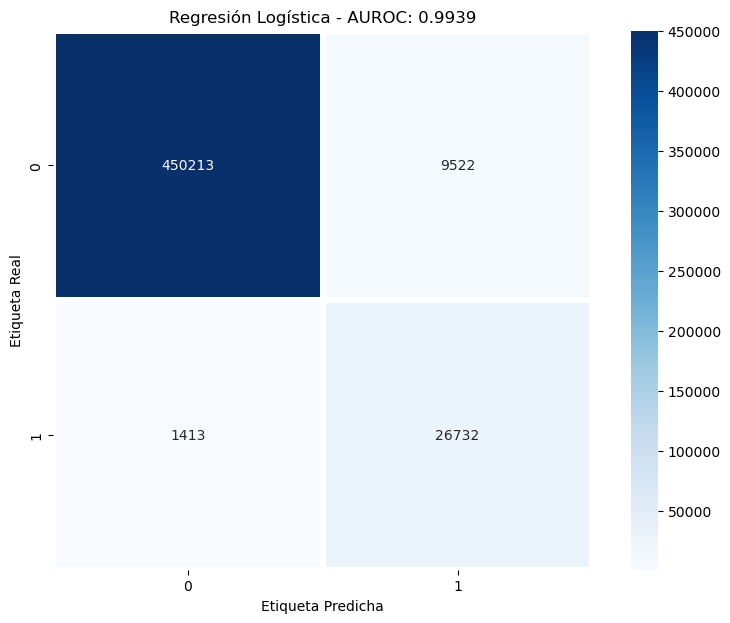


Medidas de rendimiento para Regresión Logística:
Accuracy: 0.9776
Precisión: 0.7374
Recall: 0.9498
F1-Score: 0.8302

Reporte de Clasificación:
              precision    recall  f1-score   support

           0     0.9969    0.9793    0.9880    459735
           1     0.7374    0.9498    0.8302     28145

    accuracy                         0.9776    487880
   macro avg     0.8671    0.9645    0.9091    487880
weighted avg     0.9819    0.9776    0.9789    487880



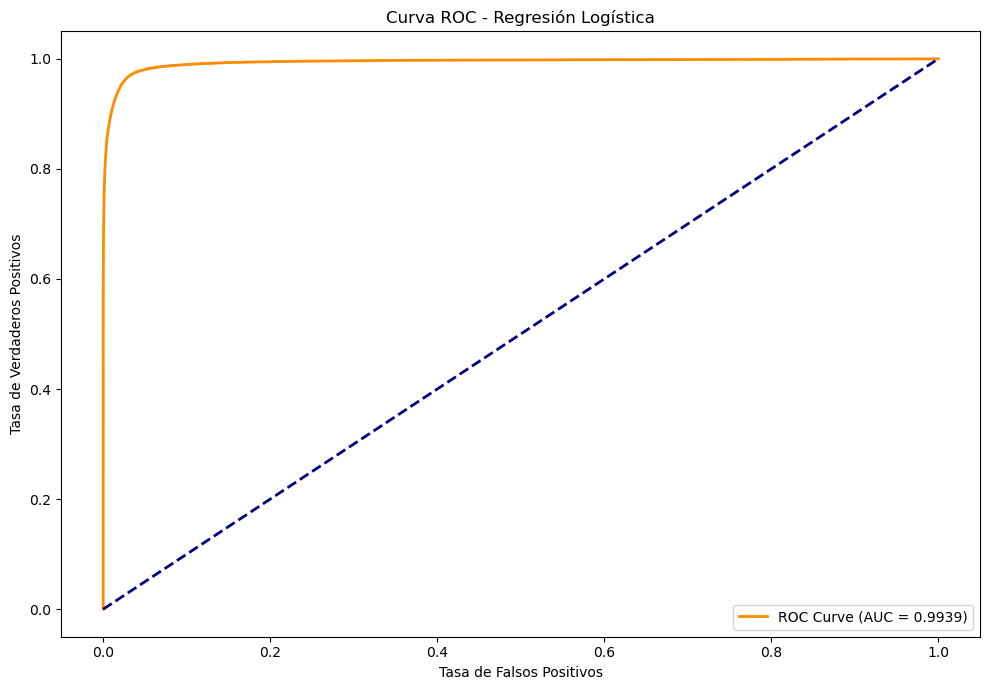

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE  # Asegúrate de tener imbalanced-learn instalado
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, f1_score, accuracy_score, precision_score, recall_score
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar dataset
df_mora_prestamos = pd.read_csv('C:/Users/g97rojasmf/Documents/Tesis/df_mora_prestamospersonales.csv')

# Separar las características y la variable objetivo
X = df_mora_prestamos.drop('Morosidad', axis=1)
y = df_mora_prestamos['Morosidad']

# Dividir los datos en conjunto de entrenamiento (70%) y prueba (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Aplicar SMOTE al conjunto de entrenamiento
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Definir los valores de la cuadrícula para la búsqueda de hiperparámetros
grid_values = {
    'penalty': ['l1', 'l2'],       # Tipo de penalización
    'C': [0.01, 0.1, 1, 10],      # Parámetro de regularización
    'solver': ['liblinear'],      # Algoritmo de optimización compatible con 'l1' y 'l2'
    'max_iter': [100, 200],       # Número máximo de iteraciones
    'fit_intercept': [True],      # Incluir el término de intercepción
    'class_weight': ['balanced', None]  # Ajuste de peso de clase para desbalanceo
}

# GridSearchCV para la búsqueda de hiperparámetros
clf_lr_grid = GridSearchCV(
    LogisticRegression(random_state=101, multi_class='ovr'),
    param_grid=grid_values,
    cv=10, 
    n_jobs=-1
)
clf_lr_grid.fit(X_train_smote, y_train_smote)

# Mostrar el mejor resultado
print("Mejores parámetros encontrados:")
print(clf_lr_grid.best_params_)

# Aplicar el modelo con los mejores hiperparámetros encontrados
clf_logReg = LogisticRegression(
    random_state=101, 
    multi_class='ovr', 
    solver=clf_lr_grid.best_params_['solver'], 
    class_weight=clf_lr_grid.best_params_['class_weight'],
    C=clf_lr_grid.best_params_['C'], 
    penalty=clf_lr_grid.best_params_['penalty'],
    max_iter=clf_lr_grid.best_params_['max_iter'],
    fit_intercept=clf_lr_grid.best_params_['fit_intercept']
)

# Entrenar el modelo
clf_logReg.fit(X_train_smote, y_train_smote)

# Predecir en los datos de prueba
y_pred_logReg = clf_logReg.predict(X_test)
probs_logReg = clf_logReg.predict_proba(X_test)
preds_logReg = probs_logReg[:, 1]

# Calcular ROC Curve y AUC
fpr_logReg, tpr_logReg, _ = roc_curve(y_test, preds_logReg)
roc_auc_logReg = auc(fpr_logReg, tpr_logReg)

# Mostrar la matriz de confusión
cm_logReg = confusion_matrix(y_test, y_pred_logReg)
plt.figure(figsize=(10, 7))
sns.heatmap(cm_logReg, annot=True, fmt=".0f", linewidths=3, square=True, cmap='Blues')
plt.ylabel('Etiqueta Real')
plt.xlabel('Etiqueta Predicha')
plt.title(f'Regresión Logística - AUROC: {roc_auc_logReg:.4f}', size=12)
plt.show()

# Calcular métricas clave
accuracy = accuracy_score(y_test, y_pred_logReg)
precision = precision_score(y_test, y_pred_logReg)
recall = recall_score(y_test, y_pred_logReg)
f1 = f1_score(y_test, y_pred_logReg)

# Imprimir métricas con 4 decimales
print("\nMedidas de rendimiento para Regresión Logística:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precisión: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")


# Reporte de Clasificación
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred_logReg, digits=4))

# Graficar la curva ROC
plt.figure(figsize=(10, 7))
plt.plot(fpr_logReg, tpr_logReg, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc_logReg:.4f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--', lw=2)
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC - Regresión Logística')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

#### MEJORES HIPERPARAMETROS DE REGRESION LOGISTICA - CROSS VALIDATION

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score, accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
 
# Cargar dataset
print("Cargando datos...")
df_mora_prestamos = pd.read_csv('C:/Users/g97rojasmf/Documents/Tesis/df_mora_prestamospersonales.csv')
X = df_mora_prestamos.drop('Morosidad', axis=1)
y = df_mora_prestamos['Morosidad']
 
# Mejores hiperparámetros
best_params = {
   'C': 10,
   'class_weight': 'balanced',
   'fit_intercept': True,
   'max_iter': 100,
   'penalty': 'l1',
   'solver': 'liblinear',  # Cambiado de 'solver' a 'liblinear'
   'random_state': 42
}
 
# Preparar KFold
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
 
# Listas para almacenar resultados
train_scores = []
val_scores = []
 
print(f"Iniciando validación cruzada con {n_splits} folds...")
 
# Realizar validación cruzada
for fold, (train_idx, val_idx) in enumerate(kf.split(X), 1):
   print(f"\nFold {fold}/{n_splits}")
   # Dividir datos
   X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
   y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]
   # Escalar datos
   scaler = StandardScaler()
   X_train_scaled = scaler.fit_transform(X_train)
   X_val_scaled = scaler.transform(X_val)
   # Aplicar SMOTE
   smote = SMOTE(random_state=42)
   X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)
   # Crear y entrenar modelo
   model = LogisticRegression(**best_params)
   model.fit(X_train_balanced, y_train_balanced)
   # Predicciones
   train_pred = model.predict(X_train_scaled)
   train_pred_proba = model.predict_proba(X_train_scaled)[:, 1]
   val_pred = model.predict(X_val_scaled)
   val_pred_proba = model.predict_proba(X_val_scaled)[:, 1]
   # Calcular métricas
   train_metrics = {
       'roc_auc': roc_auc_score(y_train, train_pred_proba),
       'precision': precision_score(y_train, train_pred),
       'recall': recall_score(y_train, train_pred),
       'f1': f1_score(y_train, train_pred),
       'accuracy': accuracy_score(y_train, train_pred)
   }
   val_metrics = {
       'roc_auc': roc_auc_score(y_val, val_pred_proba),
       'precision': precision_score(y_val, val_pred),
       'recall': recall_score(y_val, val_pred),
       'f1': f1_score(y_val, val_pred),
       'accuracy': accuracy_score(y_val, val_pred)
   }
   train_scores.append(train_metrics)
   val_scores.append(val_metrics)
   print("\nMétricas de entrenamiento:")
   for metric, value in train_metrics.items():
       print(f"{metric}: {value:.4f}")
   print("\nMétricas de validación:")
   for metric, value in val_metrics.items():
       print(f"{metric}: {value:.4f}")
 
# Calcular promedios y desviaciones estándar
train_means = pd.DataFrame(train_scores).mean()
train_stds = pd.DataFrame(train_scores).std()
val_means = pd.DataFrame(val_scores).mean()
val_stds = pd.DataFrame(val_scores).std()
 
# Crear DataFrame para el resumen
summary_data = {
   'Train Mean': train_means,
   'Train Std': train_stds,
   'Val Mean': val_means,
   'Val Std': val_stds,
   'Diff (Train-Val)': train_means - val_means
}
 
summary_df = pd.DataFrame(summary_data).round(4)
 
print("\nResumen de validación cruzada:")
print(summary_df)
 
# Guardar resultados
summary_df.to_csv('logistic_regression_cv_results.csv')
 
# Evaluar overfitting
print("\nEvaluación de overfitting:")
for metric in train_means.index:
   diff = train_means[metric] - val_means[metric]
   print(f"\n{metric}:")
   print(f"Diferencia Train-Val: {abs(diff):.4f}")
   if abs(diff) > 0.02:
       print("⚠️ Posible overfitting detectado")
   else:
       print("✓ No hay evidencia de overfitting")

Cargando datos...
Iniciando validación cruzada con 5 folds...

Fold 1/5

Métricas de entrenamiento:
roc_auc: 0.9950
precision: 0.6936
recall: 0.9687
f1: 0.8084
accuracy: 0.9734

Métricas de validación:
roc_auc: 0.9955
precision: 0.6936
recall: 0.9705
f1: 0.8090
accuracy: 0.9738

Fold 2/5

Métricas de entrenamiento:
roc_auc: 0.9953
precision: 0.6972
recall: 0.9690
f1: 0.8109
accuracy: 0.9739

Métricas de validación:
roc_auc: 0.9945
precision: 0.6971
recall: 0.9669
f1: 0.8101
accuracy: 0.9738

Fold 3/5

Métricas de entrenamiento:
roc_auc: 0.9952
precision: 0.6966
recall: 0.9691
f1: 0.8105
accuracy: 0.9739

Métricas de validación:
roc_auc: 0.9950
precision: 0.6955
recall: 0.9671
f1: 0.8091
accuracy: 0.9735

Fold 4/5

Métricas de entrenamiento:
roc_auc: 0.9951
precision: 0.6956
recall: 0.9687
f1: 0.8098
accuracy: 0.9738

Métricas de validación:
roc_auc: 0.9951
precision: 0.6956
recall: 0.9684
f1: 0.8096
accuracy: 0.9737

Fold 5/5

Métricas de entrenamiento:
roc_auc: 0.9950
precision: 0.694

#### MEJORES HIPERPARAMETROS DE REGRESION LOGISTICA - INCORPORACION DE NUEVOS DATOS (VALIDACIÓN)

Entrenando Regresión Logística con los mejores hiperparámetros...

Comparación de Métricas entre Dataset Prueba (Original) y Dataset Real:
     Métrica  Dataset Prueba (Original)  Dataset Real  Desvío
0   Accuracy                     0.9738        0.1012  0.8726
1  Precision                     0.6962        0.0733  0.6229
2     Recall                     0.9683        0.9999  0.0316
3   F1-Score                     0.8100        0.1365  0.6735
4    ROC-AUC                     0.9949        0.9968  0.0019


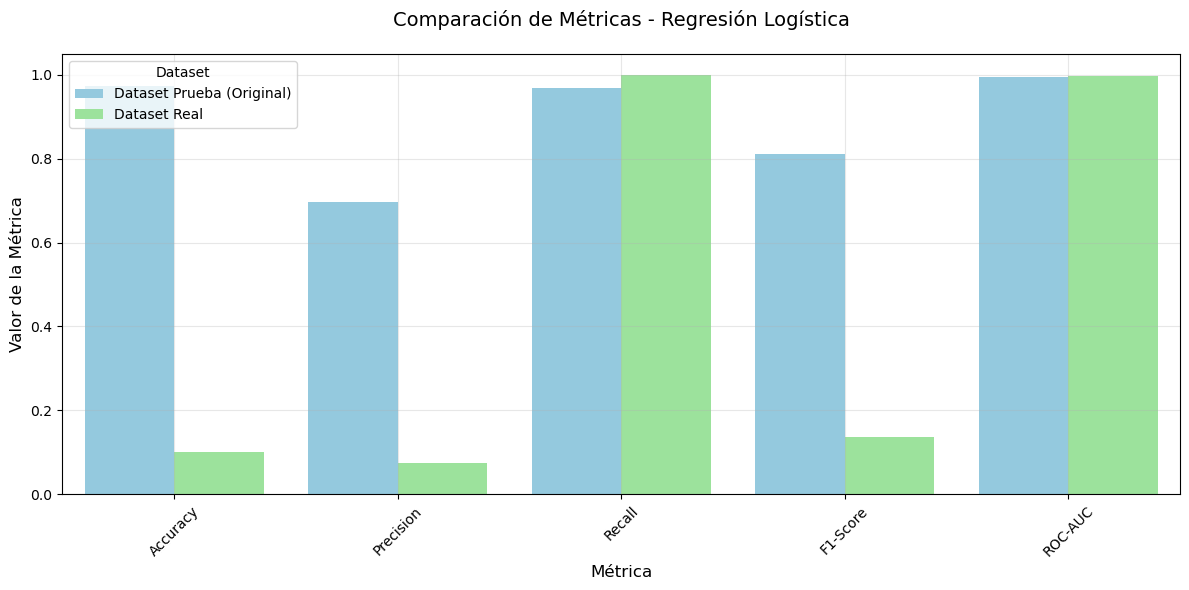

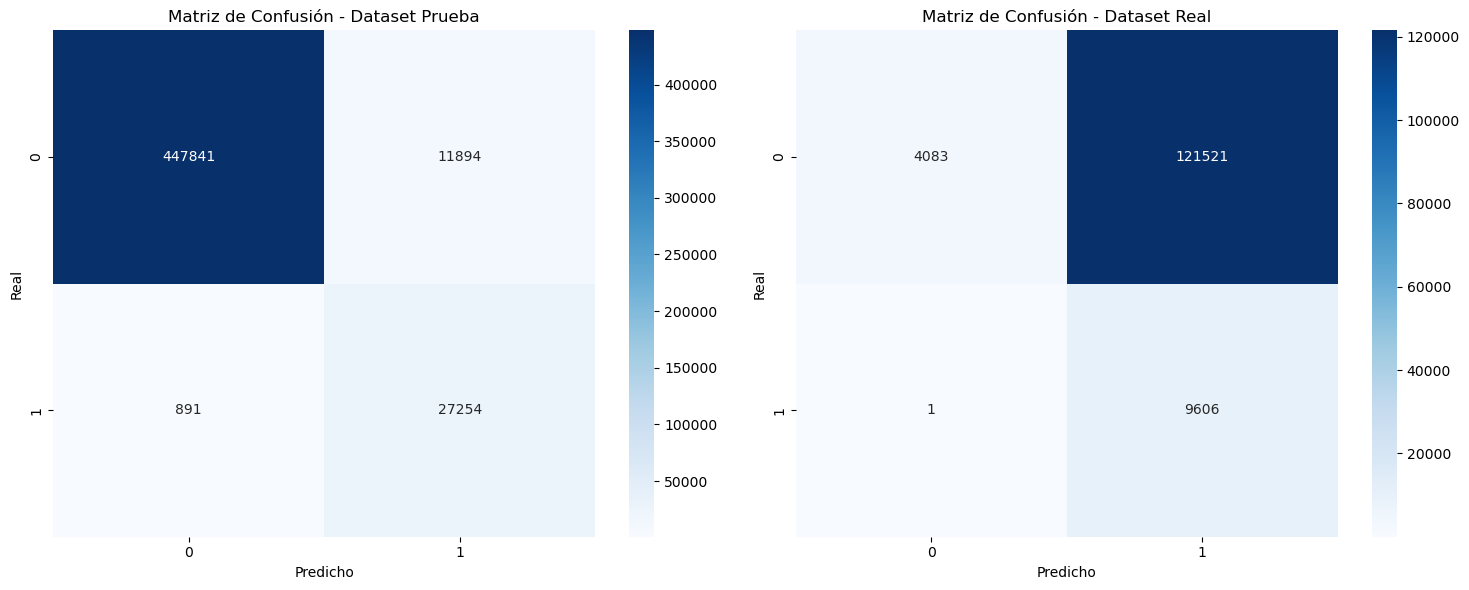

In [13]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
   classification_report,
   roc_auc_score,
   recall_score,
   f1_score,
   accuracy_score,
   precision_score,
   confusion_matrix,
   roc_curve
)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt

# Función para calcular métricas
def calcular_metricas(modelo, X, y):
   y_pred = modelo.predict(X)
   y_pred_proba = modelo.predict_proba(X)[:, 1]
   roc_auc = roc_auc_score(y, y_pred_proba)
   recall = recall_score(y, y_pred)
   precision = precision_score(y, y_pred)
   f1 = f1_score(y, y_pred)
   accuracy = accuracy_score(y, y_pred)
   return {
       'Accuracy': round(accuracy, 4),
       'Precision': round(precision, 4),
       'Recall': round(recall, 4),
       'F1-Score': round(f1, 4),
       'ROC-AUC': round(roc_auc, 4)
   }

# Cargar datasets
df_mora_prestamos_original = pd.read_csv('C:/Users/g97rojasmf/Documents/Tesis/df_mora_prestamospersonales.csv')
nuevo_dataset = pd.read_csv('C:/Users/g97rojasmf/Documents/Tesis/df_mora_prestamospersonales_012024.csv')

# Separar características y variable objetivo
X_original = df_mora_prestamos_original.drop('Morosidad', axis=1)
y_original = df_mora_prestamos_original['Morosidad']
X_nuevo = nuevo_dataset.drop('Morosidad', axis=1)
y_nuevo = nuevo_dataset['Morosidad']

# Asegurar nombres consistentes
X_original.columns = X_original.columns.str.replace(' ', '_')
X_nuevo.columns = X_nuevo.columns.str.replace(' ', '_')

# Dividir datos del dataset original
X_train, X_test, y_train, y_test = train_test_split(
   X_original, y_original, test_size=0.3, stratify=y_original, random_state=42
)

# Escalar datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_nuevo_scaled = scaler.transform(X_nuevo)

# Aplicar SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)

# Mejores hiperparámetros
best_params = {
   'C': 10,
   'class_weight': 'balanced',
   'fit_intercept': True,
   'max_iter': 100,
   'penalty': 'l1',
   'solver': 'liblinear',
   'random_state': 42
}

# Crear y entrenar el modelo
print("Entrenando Regresión Logística con los mejores hiperparámetros...")
modelo = LogisticRegression(**best_params)
modelo.fit(X_train_balanced, y_train_balanced)

# Calcular métricas en conjunto de prueba original
metricas_test = calcular_metricas(modelo, X_test_scaled, y_test)

# Calcular métricas en nuevo dataset
metricas_nuevo = calcular_metricas(modelo, X_nuevo_scaled, y_nuevo)

# Comparar métricas
comparacion_metricas = pd.DataFrame({
   'Métrica': list(metricas_test.keys()),
   'Dataset Prueba (Original)': list(metricas_test.values()),
   'Dataset Real': list(metricas_nuevo.values()),
   'Desvío': [
       round(abs(metricas_test[m] - metricas_nuevo[m]), 4) for m in metricas_test
   ]
})

# Mostrar resultados
print("\nComparación de Métricas entre Dataset Prueba (Original) y Dataset Real:")
print(comparacion_metricas)

# Visualizar comparación
plt.figure(figsize=(12, 6))
sns.barplot(
   data=comparacion_metricas.melt(id_vars='Métrica', 
                                 value_vars=['Dataset Prueba (Original)', 'Dataset Real']),
   x='Métrica', 
   y='value', 
   hue='variable',
   palette=['skyblue', 'lightgreen']
)

plt.title("Comparación de Métricas - Regresión Logística", fontsize=14, pad=20)
plt.ylabel("Valor de la Métrica", fontsize=12)
plt.xlabel("Métrica", fontsize=12)
plt.legend(title="Dataset", title_fontsize=10)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('comparacion_metricas_lr.png')
plt.show()

# Matrices de confusión
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Dataset de prueba
sns.heatmap(confusion_matrix(y_test, modelo.predict(X_test_scaled)), 
           annot=True, fmt='d', cmap='Blues', ax=ax1)
ax1.set_title('Matriz de Confusión - Dataset Prueba')
ax1.set_ylabel('Real')
ax1.set_xlabel('Predicho')

# Dataset nuevo
sns.heatmap(confusion_matrix(y_nuevo, modelo.predict(X_nuevo_scaled)), 
           annot=True, fmt='d', cmap='Blues', ax=ax2)
ax2.set_title('Matriz de Confusión - Dataset Real')
ax2.set_ylabel('Real')
ax2.set_xlabel('Predicho')

plt.tight_layout()
plt.savefig('matrices_confusion_lr.png')
plt.show()

# Guardar resultados
comparacion_metricas.to_csv('resultados_regresion_logistica.csv', index=False)

Cargando datos...
Preparando datos...
Aplicando SMOTE...
Entrenando modelo...
Realizando predicciones...


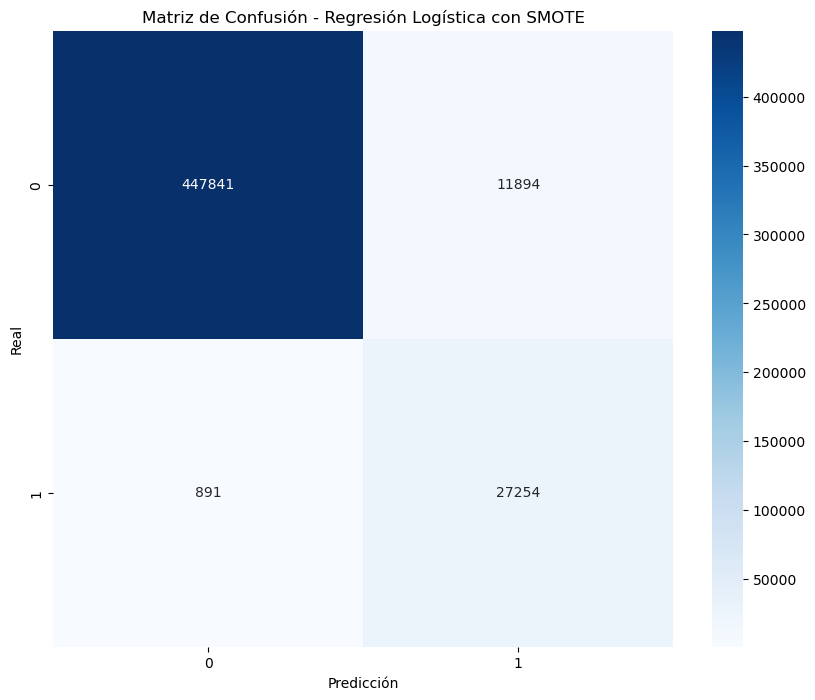


Métricas en conjunto de prueba:
ROC-AUC: 0.9949
Precision: 0.6962
Recall: 0.9683
F1-Score: 0.8100
Accuracy: 0.9738
Especificidad: 0.9741

Tiempo de ejecución: 0:00:35.495378


In [19]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, precision_score, recall_score, f1_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
 
# Iniciar el tiempo
start_time = datetime.now()
 
# Cargar dataset
print("Cargando datos...")
df_mora_prestamos = pd.read_csv('C:/Users/g97rojasmf/Documents/Tesis/df_mora_prestamospersonales.csv')
 
# Separar características y variable objetivo
X = df_mora_prestamos.drop('Morosidad', axis=1)
y = df_mora_prestamos['Morosidad']
 
# Dividir datos
print("Preparando datos...")
X_train, X_test, y_train, y_test = train_test_split(
   X, y, test_size=0.3, stratify=y, random_state=42
)
 
# Escalar datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
 
# Aplicar SMOTE a los datos de entrenamiento
print("Aplicando SMOTE...")
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)
 
# Definir los mejores parámetros encontrados
best_params = {
   'C': 10,
   'class_weight': 'balanced',
   'fit_intercept': True,
   'max_iter': 100,
   'penalty': 'l1',
   'solver': 'liblinear',
   'random_state': 42
}
 
# Entrenar el modelo con los mejores parámetros en datos balanceados
print("Entrenando modelo...")
model = LogisticRegression(**best_params)
model.fit(X_train_balanced, y_train_balanced)
 
# Realizar predicciones
print("Realizando predicciones...")
y_pred = model.predict(X_test_scaled)
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
 
# Calcular métricas
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
especificidad = tn / (tn + fp)
 
metrics = {
   'ROC-AUC': roc_auc_score(y_test, y_pred_proba),
   'Precision': precision_score(y_test, y_pred),
   'Recall': recall_score(y_test, y_pred),
   'F1-Score': f1_score(y_test, y_pred),
   'Accuracy': accuracy_score(y_test, y_pred),
   'Especificidad': especificidad
}
 
# Calcular tiempo de ejecución
end_time = datetime.now()
execution_time = end_time - start_time
 
# Visualización de la matriz de confusión
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión - Regresión Logística con SMOTE')
plt.ylabel('Real')
plt.xlabel('Predicción')
plt.show()
 
# Imprimir métricas y tiempo de ejecución
print('\nMétricas en conjunto de prueba:')
for metric, value in metrics.items():
   print(f'{metric}: {value:.4f}')
 
print(f'\nTiempo de ejecución: {execution_time}')
 
# Guardar los mejores parámetros
pd.DataFrame([best_params]).to_csv('mejores_parametros_regresion_logistica.csv', index=False)